## Problem Statement : Bike Sharing System 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Read the dataset

In [42]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Read Dataset From CSV file
df = pd.read_csv('day.csv')

In [44]:
df.shape

(730, 16)

In [45]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Understanding & Cleaning

In [48]:
# Decode the numbered columns back to actual string values using data dictionary

seasons = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df['season'] = df['season'].astype(str).map(lambda x: seasons[int(x)])

year = {0: "2018", 1:"2019"}
df['yr'] = df['yr'].astype(str).map(lambda x: year[int(x)])

weather = {1: "Clear", 2: "Cloudy", 3: "Light Rain",4: "Heavy Rain"}
df['weathersit'] = df['weathersit'].astype(str).map(lambda x: weather[int(x)])

months = {1:"Jan", 2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df['mnth'] = df['mnth'].astype(str).map(lambda x: months[int(x)])

days = {0:"Sun", 1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
df['weekday'] = df['weekday'].astype(str).map(lambda x: days[int(x)])

In [49]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualizing dataset

C:\Users\Krishna.Chaitanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


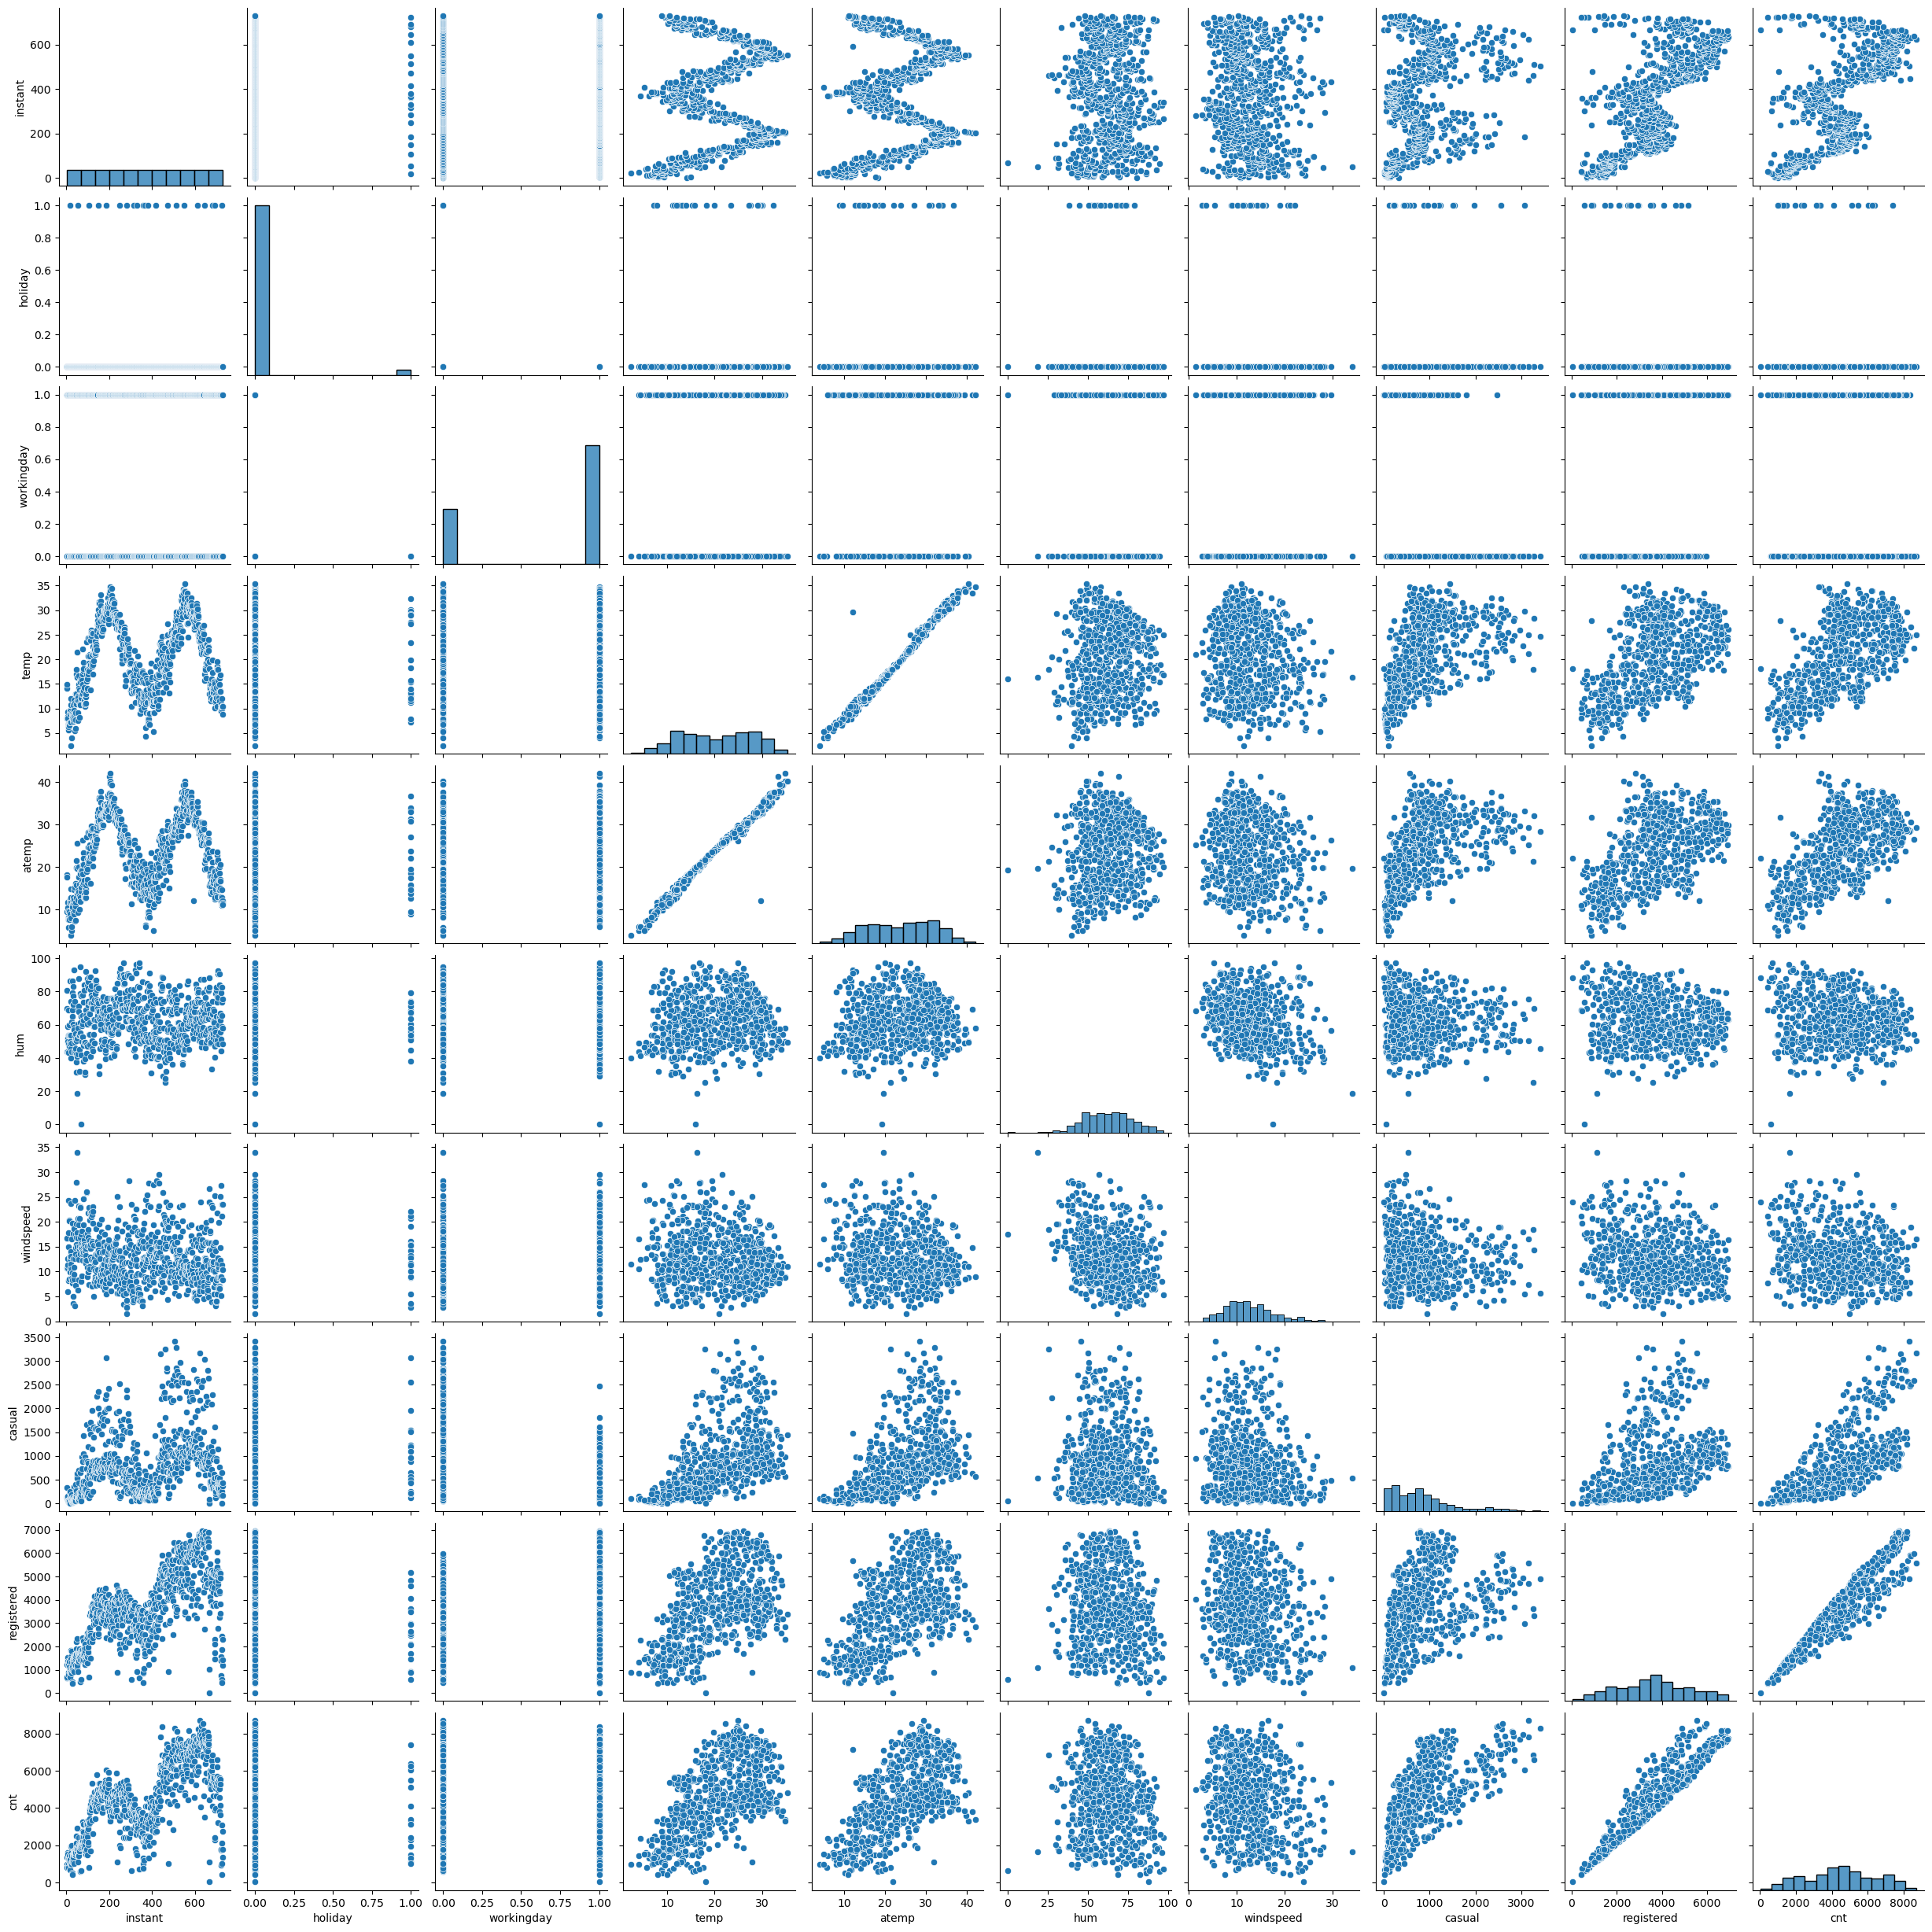

In [50]:
# visualizing numerical data

sns.pairplot(df)
plt.show()

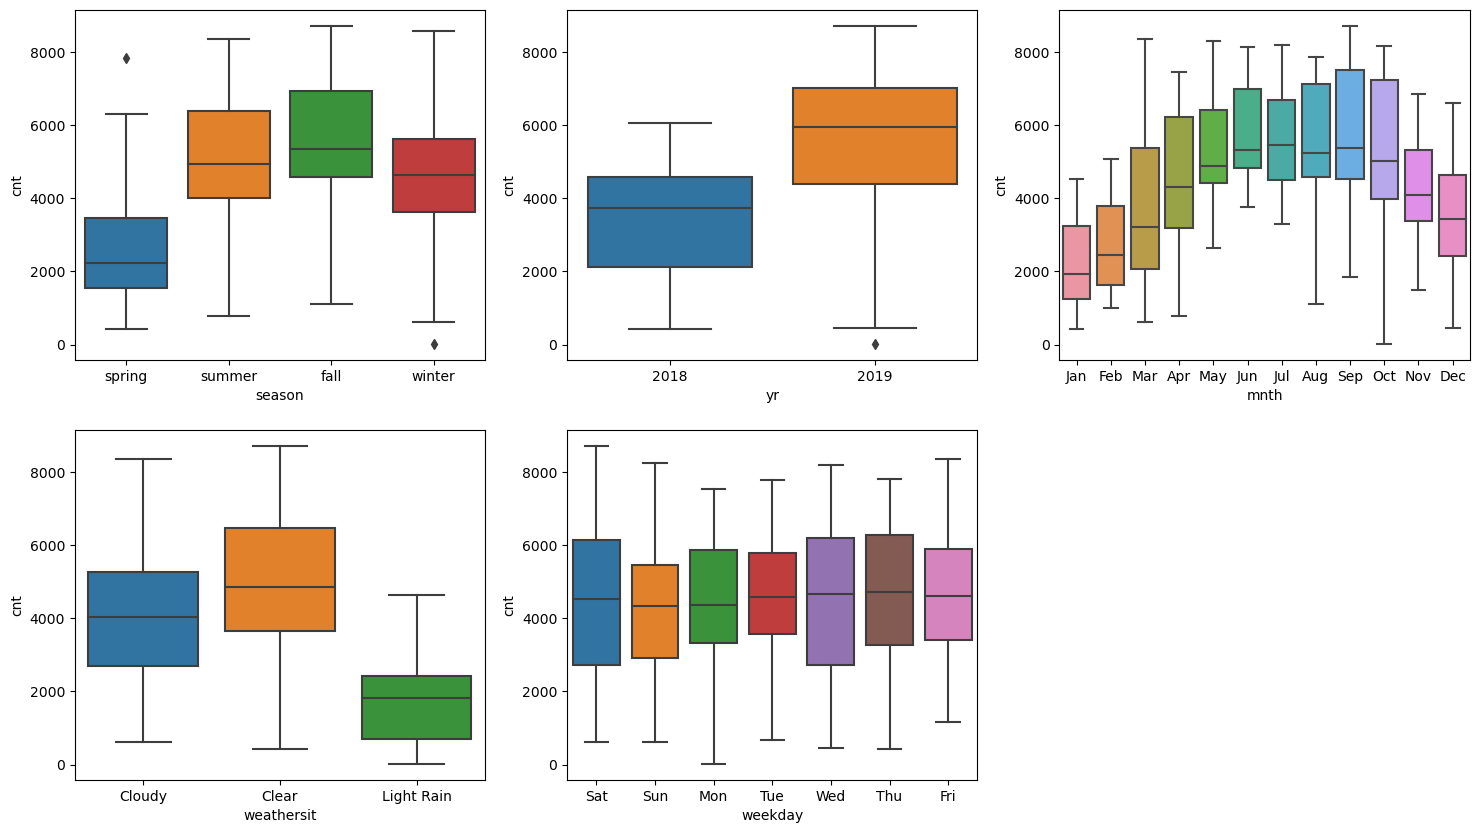

In [51]:
# visualising categorical data
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.show()

### Converting some categorical cols into dummy variables for better analysis and interpretations

In [10]:
vars = ['season', 'yr','weathersit', 'mnth', 'weekday']

In [11]:
dummies = pd.get_dummies(df[vars],drop_first=True, dtype='int')

In [12]:
df = pd.concat([df,dummies],axis=1)

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df.drop(['season', 'yr', 'weathersit','instant', 'dteday', 'mnth', 'weekday'],axis=1 , inplace= True)

In [15]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,1


### Test-Train data split

In [16]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


### Feature scaling

In [17]:
vars=['temp','atemp','hum','windspeed','casual','registered','cnt']

scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])

In [18]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.243137,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.429398,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
y_train=df_train.pop('cnt')
X_train = df_train

## Generate first model

In [20]:
# add constants
X_train_sm = sm.add_constant(X_train[['holiday','atemp','hum']])

#create model

lr = sm.OLS(y_train,X_train_sm)

lr_model =lr.fit()

In [21]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.03e-65
Time:                        01:18:51   Log-Likelihood:                 192.23
No. Observations:                 510   AIC:                            -376.5
Df Residuals:                     506   BIC:                            -359.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3248      0.036      8.995      0.000       0.254       0.396
holiday       -0.0759      0.047     -1.617      0.106      -0.168       0.016
atemp          0.7118      0.035     20.129      0.000       0.642       0.781
hum           -0.2684      0.051     -5.223      0.000      -0.369      -0.167
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                1.018
Skew:                           0.055   Prob(JB):                        0.601
Kurtosis:                       2.811   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check VIF

In [22]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range( X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values( by= 'VIF', ascending =False)

,Features,VIF
0,const,23.94
2,atemp,1.03
3,hum,1.03
1,holiday,1.01


## Iterating by adding features and checking the R2 value

In [23]:
# add constants
X_train_sm = sm.add_constant(X_train[['holiday','atemp','hum','windspeed']])

#create model

lr = sm.OLS(y_train,X_train_sm)

lr_model =lr.fit()

In [24]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.66e-70
Time:                        01:18:51   Log-Likelihood:                 204.78
No. Observations:                 510   AIC:                            -399.6
Df Residuals:                     505   BIC:                            -378.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4542      0.044     10.416      0.000       0.369       0.540
holiday       -0.0764      0.046     -1.666      0.096      -0.166       0.014
atemp          0.6802      0.035     19.378      0.000       0.611       0.749
hum           -0.3309      0.052     -6.401      0.000      -0.433      -0.229
windspeed     -0.2261      0.045     -5.046      0.000      -0.314      -0.138
==============================================================================
Omnibus:                        1.244   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.331
Skew:                           0.091   Prob(JB):                        0.514
Kurtosis:                       2.829   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# add constants
X_train_sm = sm.add_constant(X_train[['holiday','atemp','hum','windspeed','casual']])

#create model

lr = sm.OLS(y_train,X_train_sm)

lr_model =lr.fit()

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.31e-95
Time:                        01:18:51   Log-Likelihood:                 266.72
No. Observations:                 510   AIC:                            -521.4
Df Residuals:                     504   BIC:                            -496.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3778      0.039      9.637      0.000       0.301       0.455
holiday       -0.0929      0.041     -2.286      0.023      -0.173      -0.013
atemp          0.4351      0.037     11.624      0.000       0.362       0.509
hum           -0.2246      0.047     -4.807      0.000      -0.316      -0.133
windspeed     -0.1671      0.040     -4.174      0.000      -0.246      -0.088
casual         0.4495      0.038     11.772      0.000       0.374       0.524
==============================================================================
Omnibus:                       20.399   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.021
Skew:                           0.172   Prob(JB):                      0.00404
Kurtosis:                       2.368   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range( X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values( by= 'VIF', ascending =False)

,Features,VIF
0,const,37.65
2,atemp,1.55
5,casual,1.51
3,hum,1.14
4,windspeed,1.13
1,holiday,1.01


## Generate final model

In [28]:
# add constants
X_train_sm = sm.add_constant(X_train[['holiday','atemp','hum','windspeed','casual','season_spring','season_winter','yr_2019']])

#create model

lr = sm.OLS(y_train,X_train_sm)

lr_model =lr.fit()

In [29]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     309.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.32e-188
Time:                        01:18:51   Log-Likelihood:                 493.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     501   BIC:                            -930.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3600      0.031     11.671      0.000       0.299       0.421
holiday          -0.0841      0.026     -3.207      0.001      -0.136      -0.033
atemp             0.3935      0.032     12.349      0.000       0.331       0.456
hum              -0.2462      0.031     -8.012      0.000      -0.307      -0.186
windspeed        -0.1692      0.026     -6.533      0.000      -0.220      -0.118
casual            0.2726      0.026     10.662      0.000       0.222       0.323
season_spring    -0.0897      0.015     -5.917      0.000      -0.119      -0.060
season_winter     0.0544      0.012      4.409      0.000       0.030       0.079
yr_2019           0.2107      0.009     24.601      0.000       0.194       0.228
==============================================================================
Omnibus:                       94.642   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.215
Skew:                          -0.988   Prob(JB):                     1.66e-45
Kurtosis:                       5.407   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Check: VIF should be less than 5

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range( X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values( by= 'VIF', ascending =False)

,Features,VIF
0,const,56.33
2,atemp,2.71
6,season_spring,2.50
7,season_winter,1.68
5,casual,1.64
3,hum,1.19
4,windspeed,1.14
8,yr_2019,1.09
1,holiday,1.01


## Residual Analysis of the train data

In [31]:
y_train_pred = lr_model.predict(X_train_sm)

C:\Users\Krishna.Chaitanya\AppData\Local\Temp\ipykernel_173960\4271187744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

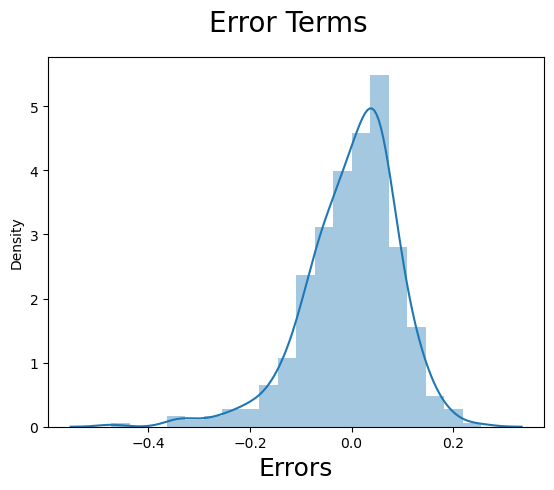

In [32]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Make predictions

In [33]:
# Applying scaling on test set

vars=['temp','atemp','hum','windspeed','casual','registered','cnt']

df_test[vars] = scaler.transform(df_test[vars])

In [34]:
# Split test set inputs and target

y_test = df_test.pop('cnt')
X_test = df_test

In [35]:
X_test_new = X_test[['holiday','atemp','hum','windspeed','casual','season_spring','season_winter','yr_2019']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [36]:
# Making predictions
y_pred = lr_model.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

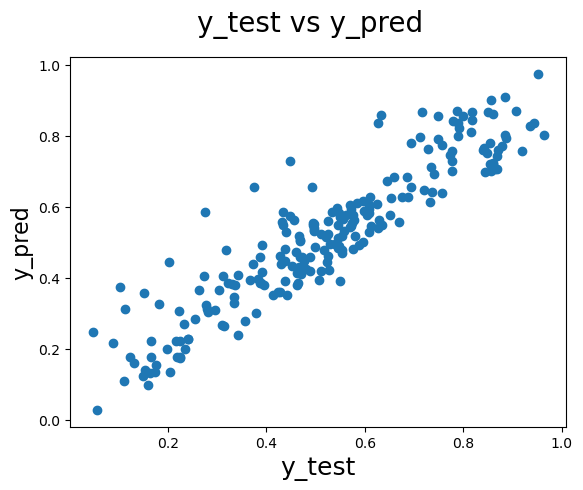

In [37]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8436503187259582